# Machine Learning

> [Material de estudo: Curso de Machine Learning - Téo](https://www.youtube.com/playlist?list=PLvlkVRRKOYFR6_LmNcJliicNan2TYeFO2)

---

## Conceitos

> Simplificando. Apresentação e explicação de conceitos de forma dinâmica.

- Vamos partir do processo de separação de dados, como eu posso separar uma base de dados, em grupos de indivíduos semelhantes com base nas características, ou seja, as variáveis independentes?

```py
> Sinônimos de Variáveis Independentes:
'Atributos' / 'Covariáveis' / 'Variáveis Explicativas' / 'Variáveis Preditoras'

> Sinônimos de Variável Dependente:
'Variável Alvo' / 'Variável Resposta'
```

>  Criando regras é que podemos separar os nossos conjuntos de dados.
- Por exemplo, vamos olhar para um cenário de varejo.

1. Uma carteira de clientes dessa empresa pode conter as features (variáveis independentes): `identificador do cliente`, `idade`, `gênero`, `possui filhos` (sim: 1, não: 0), etc.
2. Enquanto na base de produtos vão estar diversas informações de produtos como, por exemplo de roupas: `cor`, `tamanho`, `modelo`, `marca`, `composição`, `categoria` (adulto, infantil), `genero` (u: unisex, m: masculino, f: feminino).

- Estes são exemplos de maneiras de representar um cliente e uma roupa em forma de matriz tabela, cada atributo é uma coluna da minha matriz.

- A partir disso separar meus produtos por grupos, categorizar com base nas condições, o que significa que o fator determinante para cada produto pertencer ou não a uma categoria é se ele possui ou não uma dada característica.

- Com esse reciocínio de ***filtrar*** meus grupos para ***separar*** os produtos vem a ideia de pureza, uma metáfora pode ser filtrar água.
- Nesse caso queremos "filtrar" dados, para isso existe o algoritmo da `ÁRVORE DE DECISÃO` ( `DECISION TREE` )

- Consiste em muitos `ifs` para "purificar" os dados em grupos com características semelhantes

### Algoritmo Árvore de Decisão ( `Decision Tree` )
> Esse algoritmo é usado em:
- `Random Forest`,
- em `Gradient Boosting`,
- em `Adaptive Boosting - AdaBoost`,
- em `XGBoost - Extreme Gradient Boosting`,
- em `LGBM - Light Gradient Boosting Machine`,
- em `Cat Boosting` ( Categorical Boosting ), entre outros.

1. Divide a amostra em `nós` ( `nodes` ) com base em variáveis semelhantes.
2. A árvore pode ser simétrica ou assimétrica.

- [O que é uma Árvore de Decisão? - IBM](https://www.ibm.com/br-pt/think/topics/decision-trees)
- [Árvores de Decisão - Scikit Learn](https://scikit-learn.org/stable/modules/tree.html)

> Algoritmos precursores da `Decision Tree`:
- [Algoritmo ID3 - (Ross Quinlan, 1986)](https://link.springer.com/article/10.1007/BF00116251)
- [Algoritmo CART (Breiman et al., 1984)](https://www.stat.berkeley.edu/users/breiman/arc97.pdf)

#### Implementando uma Decision Tree com um dataset de frutas

In [1]:
# Ignorar os Warnings de deprecation
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
import pandas as pd


path = Path()
data = path/'../data'

In [3]:
'Os dados são a minha amostra, os exemplos, tabela é a abstração de algo do mundo real, nesse caso frutas.'
df = pd.read_excel(data/'dados_frutas.xlsx')
df

,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


In [4]:
from sklearn import tree


arvore = tree.DecisionTreeClassifier(random_state=42)

> `y` é a _Variável **RESPOSTA**_, _Variável **DEPENDENTE**_ ou _Variável **ALVO**_ ( Também interpreto como podendo ser _IMAGEM_ do _CONTRADOMÍNIO_ de uma função )

In [5]:
y = df['Fruta']

> As características (`Atributos`) de cada uma das observações de dados no meu conjunto de dados

In [6]:
caracteristicas = ['Arredondada', 'Suculenta', 'Vermelha', 'Doce']

> `X` são _Variáveis **INDEPENDENTES**_, _Variáveis DE **ENTRADA**_, _**ATRIBUTOS**_, _**COVARIÁVEIS**_, _Variáveis **PREDITORAS**_, _Variáveis **EXPLICATIVAS**_

In [7]:
X = df[caracteristicas]

> O `.fit()` cria um classificador de árvore de decisão a partir do conjunto de treinamento `(X, y)`.
- Ele recebe o `X` e o `y`

In [8]:
arvore.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [9]:
arvore.predict([[1,1,1,1]])

array(['Cereja'], dtype=object)

In [10]:
arvore.predict([[0,1,1,1]])

array(['Morango'], dtype=object)

In [11]:
arvore.predict([[1,0,1,1]])

array(['Cereja'], dtype=object)

In [12]:
arvore.predict([[1,1,0,1]])

array(['Pera'], dtype=object)

In [13]:
arvore.predict([[1,1,1,0]])

array(['Tomate'], dtype=object)

> Plotando a `Decision Tree` para visualização

[Text(0.4090909090909091, 0.875, 'Arredondada <= 0.5\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]\nclass = Banana'),
 Text(0.18181818181818182, 0.625, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 1, 0, 0]\nclass = Banana'),
 Text(0.29545454545454547, 0.75, 'True  '),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]\nclass = Morango'),
 Text(0.6363636363636364, 0.625, 'Vermelha <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 1, 1, 0, 1, 1]\nclass = Cereja'),
 Text(0.5227272727272727, 0.75, '  False'),
 Text(0.45454545454545453, 0.375, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 1, 0]\nclass = Limão'),
 Text(0.36363636363636365, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]\nclass = Limão'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0

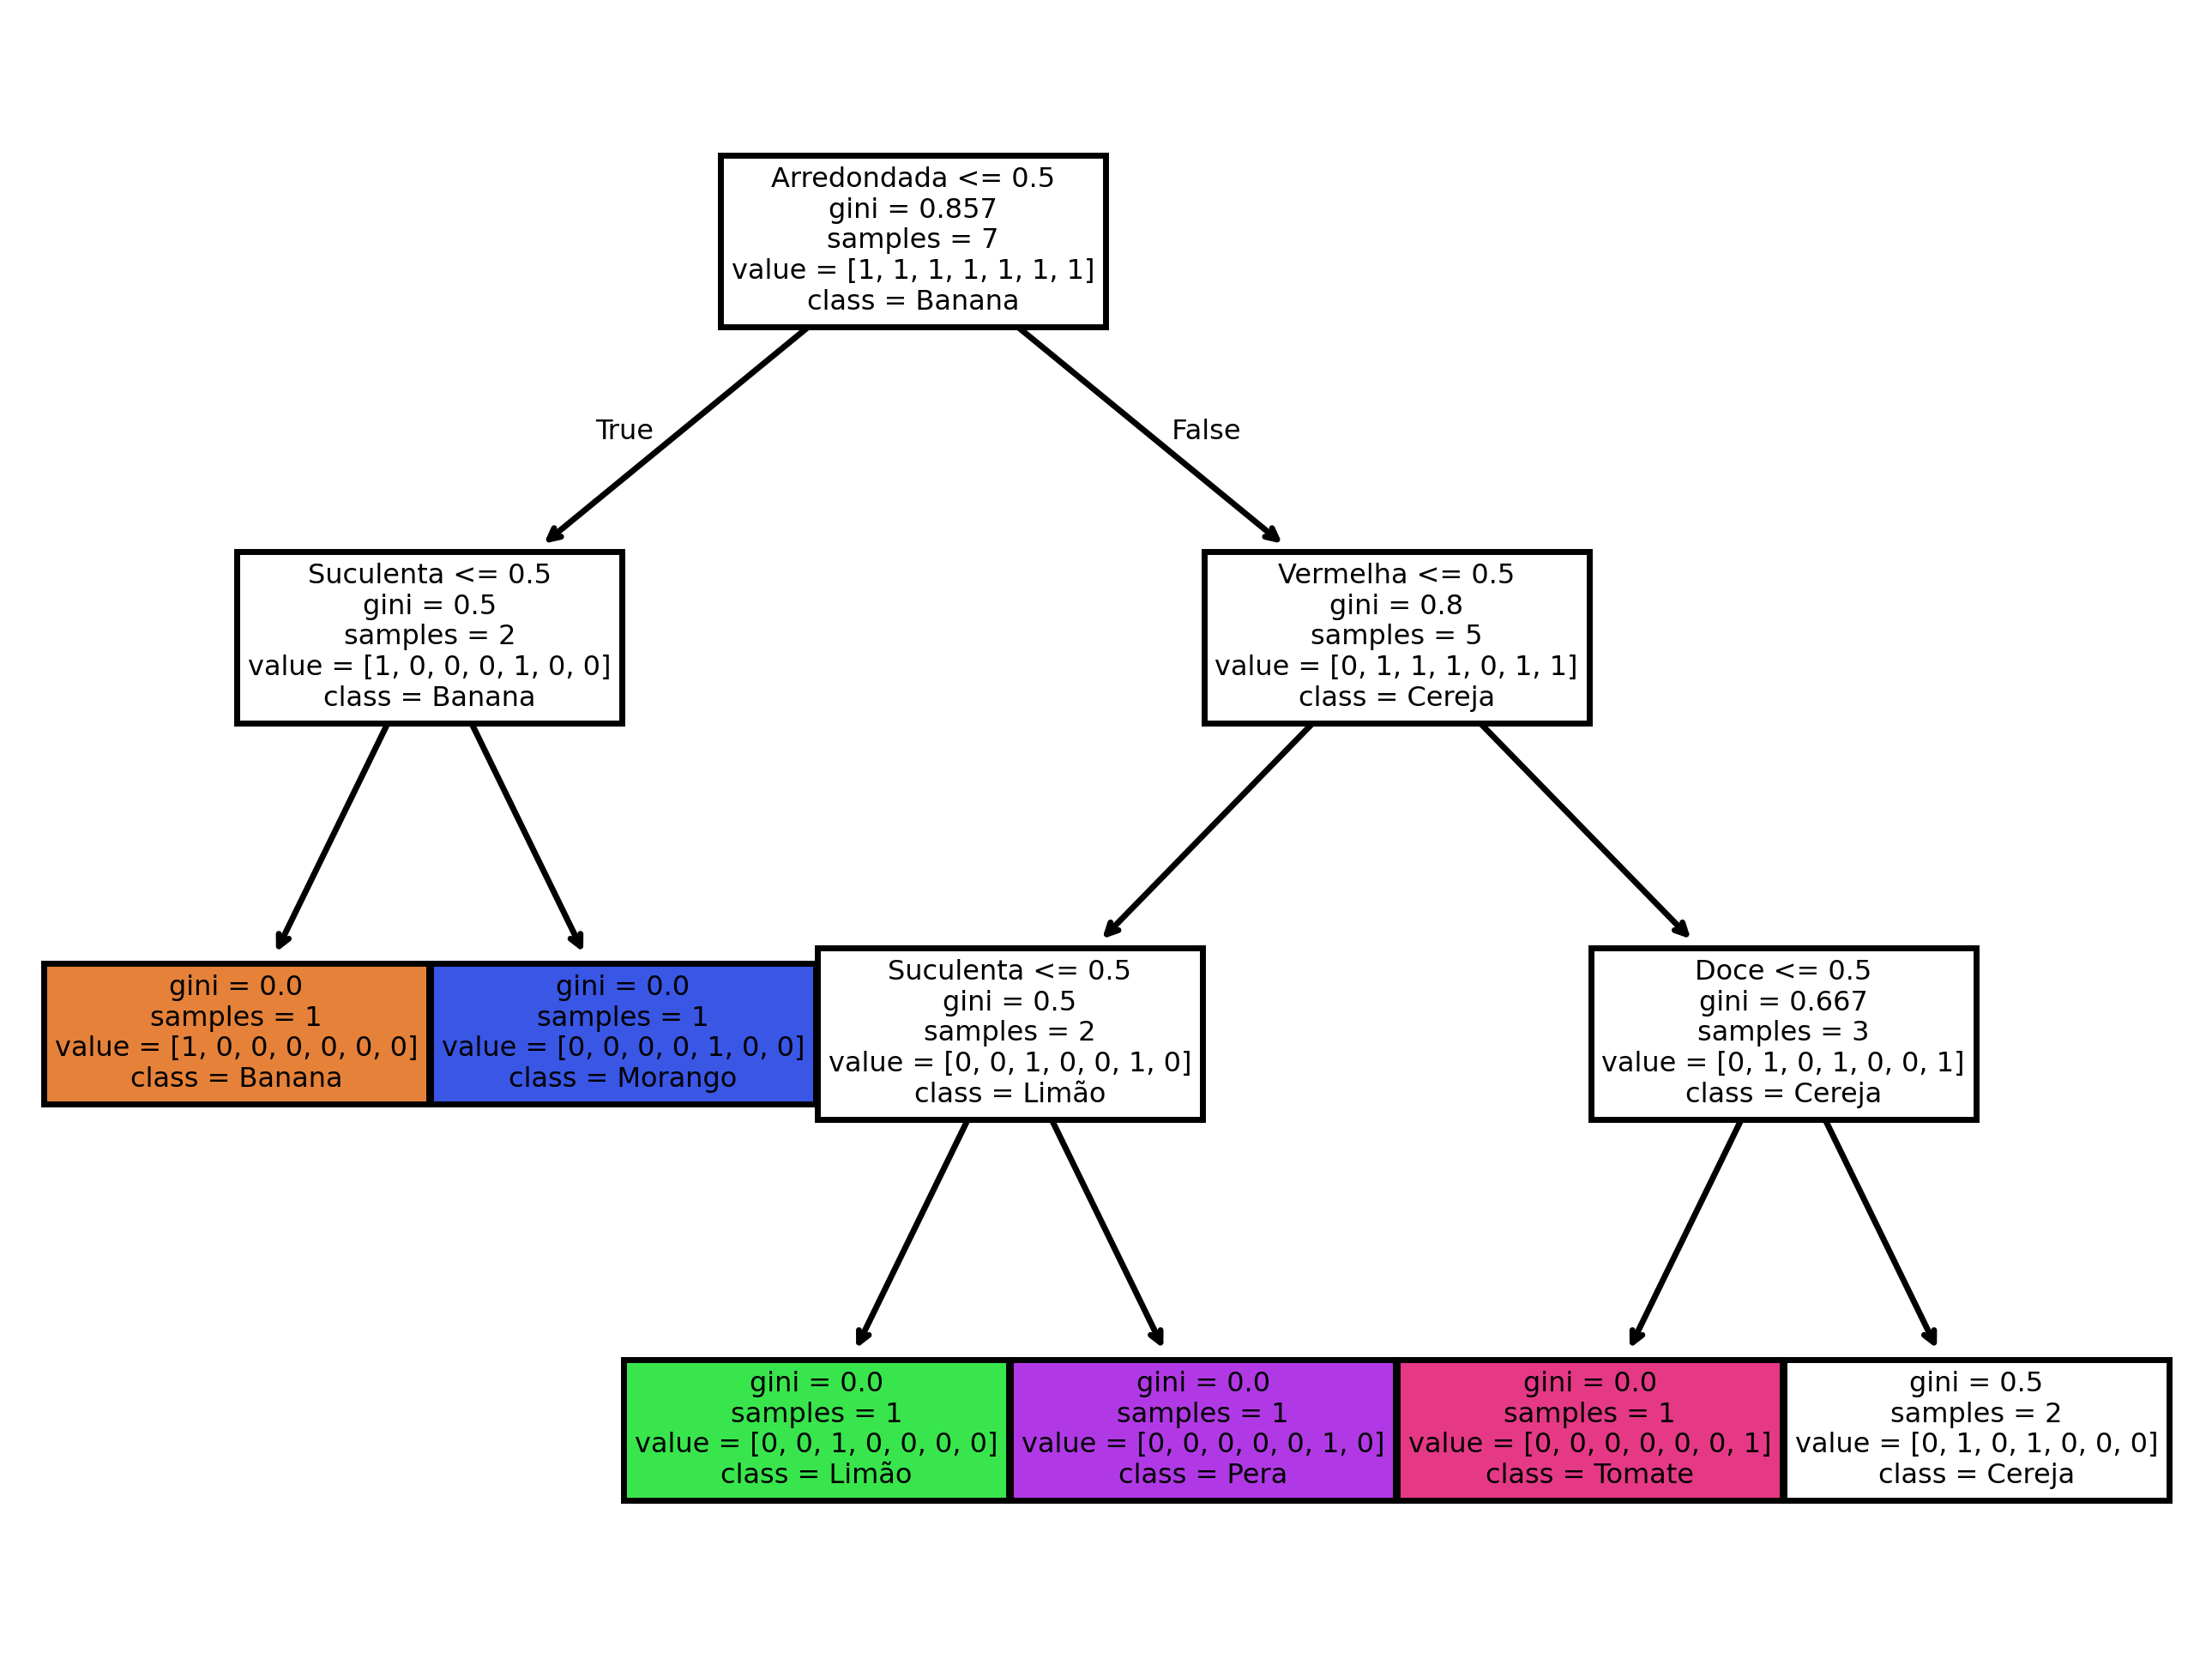

In [14]:
import matplotlib.pyplot as plt


plt.figure(dpi=500)

tree.plot_tree(
    arvore,
    feature_names=caracteristicas,
    class_names=arvore.classes_,
    filled=True,
)

In [15]:
proba = arvore.predict_proba([[0, 0, 0, 0]])[0]
pd.Series(proba, index=arvore.classes_)

Banana     1.0
Cereja     0.0
Limão      0.0
Maçã       0.0
Morango    0.0
Pera       0.0
Tomate     0.0
dtype: float64

#### Implementando um Modelo com dataset de Cerveja

In [16]:
from pathlib import Path
import pandas as pd


path = Path()
data = path/'../data'

df = pd.read_excel(data/'dados_cerveja.xlsx')
df

,id,temperatura,copo,espuma,cor,classe
0,1,-5,mud,não,escura,weissbier
1,2,-5,mud,sim,escura,weissbier
2,3,-1,pint,não,clara,weissbier
3,4,-1,pint,sim,clara,weissbier
4,5,-5,pint,não,escura,pale-ale
5,6,-5,pint,não,clara,pale-ale
6,7,-5,pint,sim,escura,pale-ale
7,8,-1,mud,não,clara,pilsen
8,9,-5,mud,não,clara,pilsen
9,10,-1,mud,sim,clara,pilsen


In [17]:
features = ['temperatura', 'copo', 'espuma', 'cor']
target = 'classe'
# Atributos, Variáveis independentes
X = df[features]
# Variável alvo
y = df[target]

In [18]:
from sklearn import tree


model = tree.DecisionTreeClassifier(random_state=42)

> Dessa forma o `model.fit()` vai levantar um erro, pois o `DecisionTreeClassifier()` do `Scikit Learn` espera que todos os valores das variáveis sejam apenas números.

In [19]:
model.fit(X=X, y=y) # RETORNA: ValueError: could not convert string to float: 'mud'

ValueError: could not convert string to float: 'mud'

> Com isso é necessário transformar em variáveis dummy para rodar o `.fit()` no modelo.
- Uma possibilidade é substituir os valores de texto por números

In [ ]:
X = X.replace({
    'mud': 1, 'pint': 2,
    'sim': 1, 'não': 0,
    'clara': 0, 'escura': 1,
})

In [ ]:
model.fit(X=X, y=y)

In [ ]:
import matplotlib.pyplot as plt


plt.figure(dpi=500)

tree.plot_tree(
    model,
    feature_names=features,
    class_names=model.classes_,
    filled=True
)

### Model Com Dataset de Star Wars

[Text(0.625, 0.9166666666666666, 'Massa(em kilos) <= 83.405\ngini = 0.189\nsamples = 1048719\nvalue = [110526, 938193]\nclass = 1'),
 Text(0.5, 0.75, 'Estatura(cm) <= 180.555\ngini = 0.436\nsamples = 344571\nvalue = [110526, 234045]\nclass = 1'),
 Text(0.5625, 0.8333333333333333, 'True  '),
 Text(0.375, 0.5833333333333334, 'Estatura(cm) <= 180.245\ngini = 0.497\nsamples = 205177\nvalue = [110526, 94651]\nclass = 0'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 53107\nvalue = [0, 53107]\nclass = 1'),
 Text(0.5, 0.4166666666666667, 'Estatura(cm) <= 180.545\ngini = 0.397\nsamples = 152070\nvalue = [110526, 41544]\nclass = 0'),
 Text(0.25, 0.25, 'Estatura(cm) <= 180.255\ngini = 0.392\nsamples = 148388\nvalue = [108658, 39730]\nclass = 0'),
 Text(0.125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.75, 0.25, 'Massa(em kilos) <= 83.395\ngini = 0.5\nsamples = 3682\nvalue = [1868.0, 1814.0]\nclass = 0'),
 Text(0.625, 0.08333333333

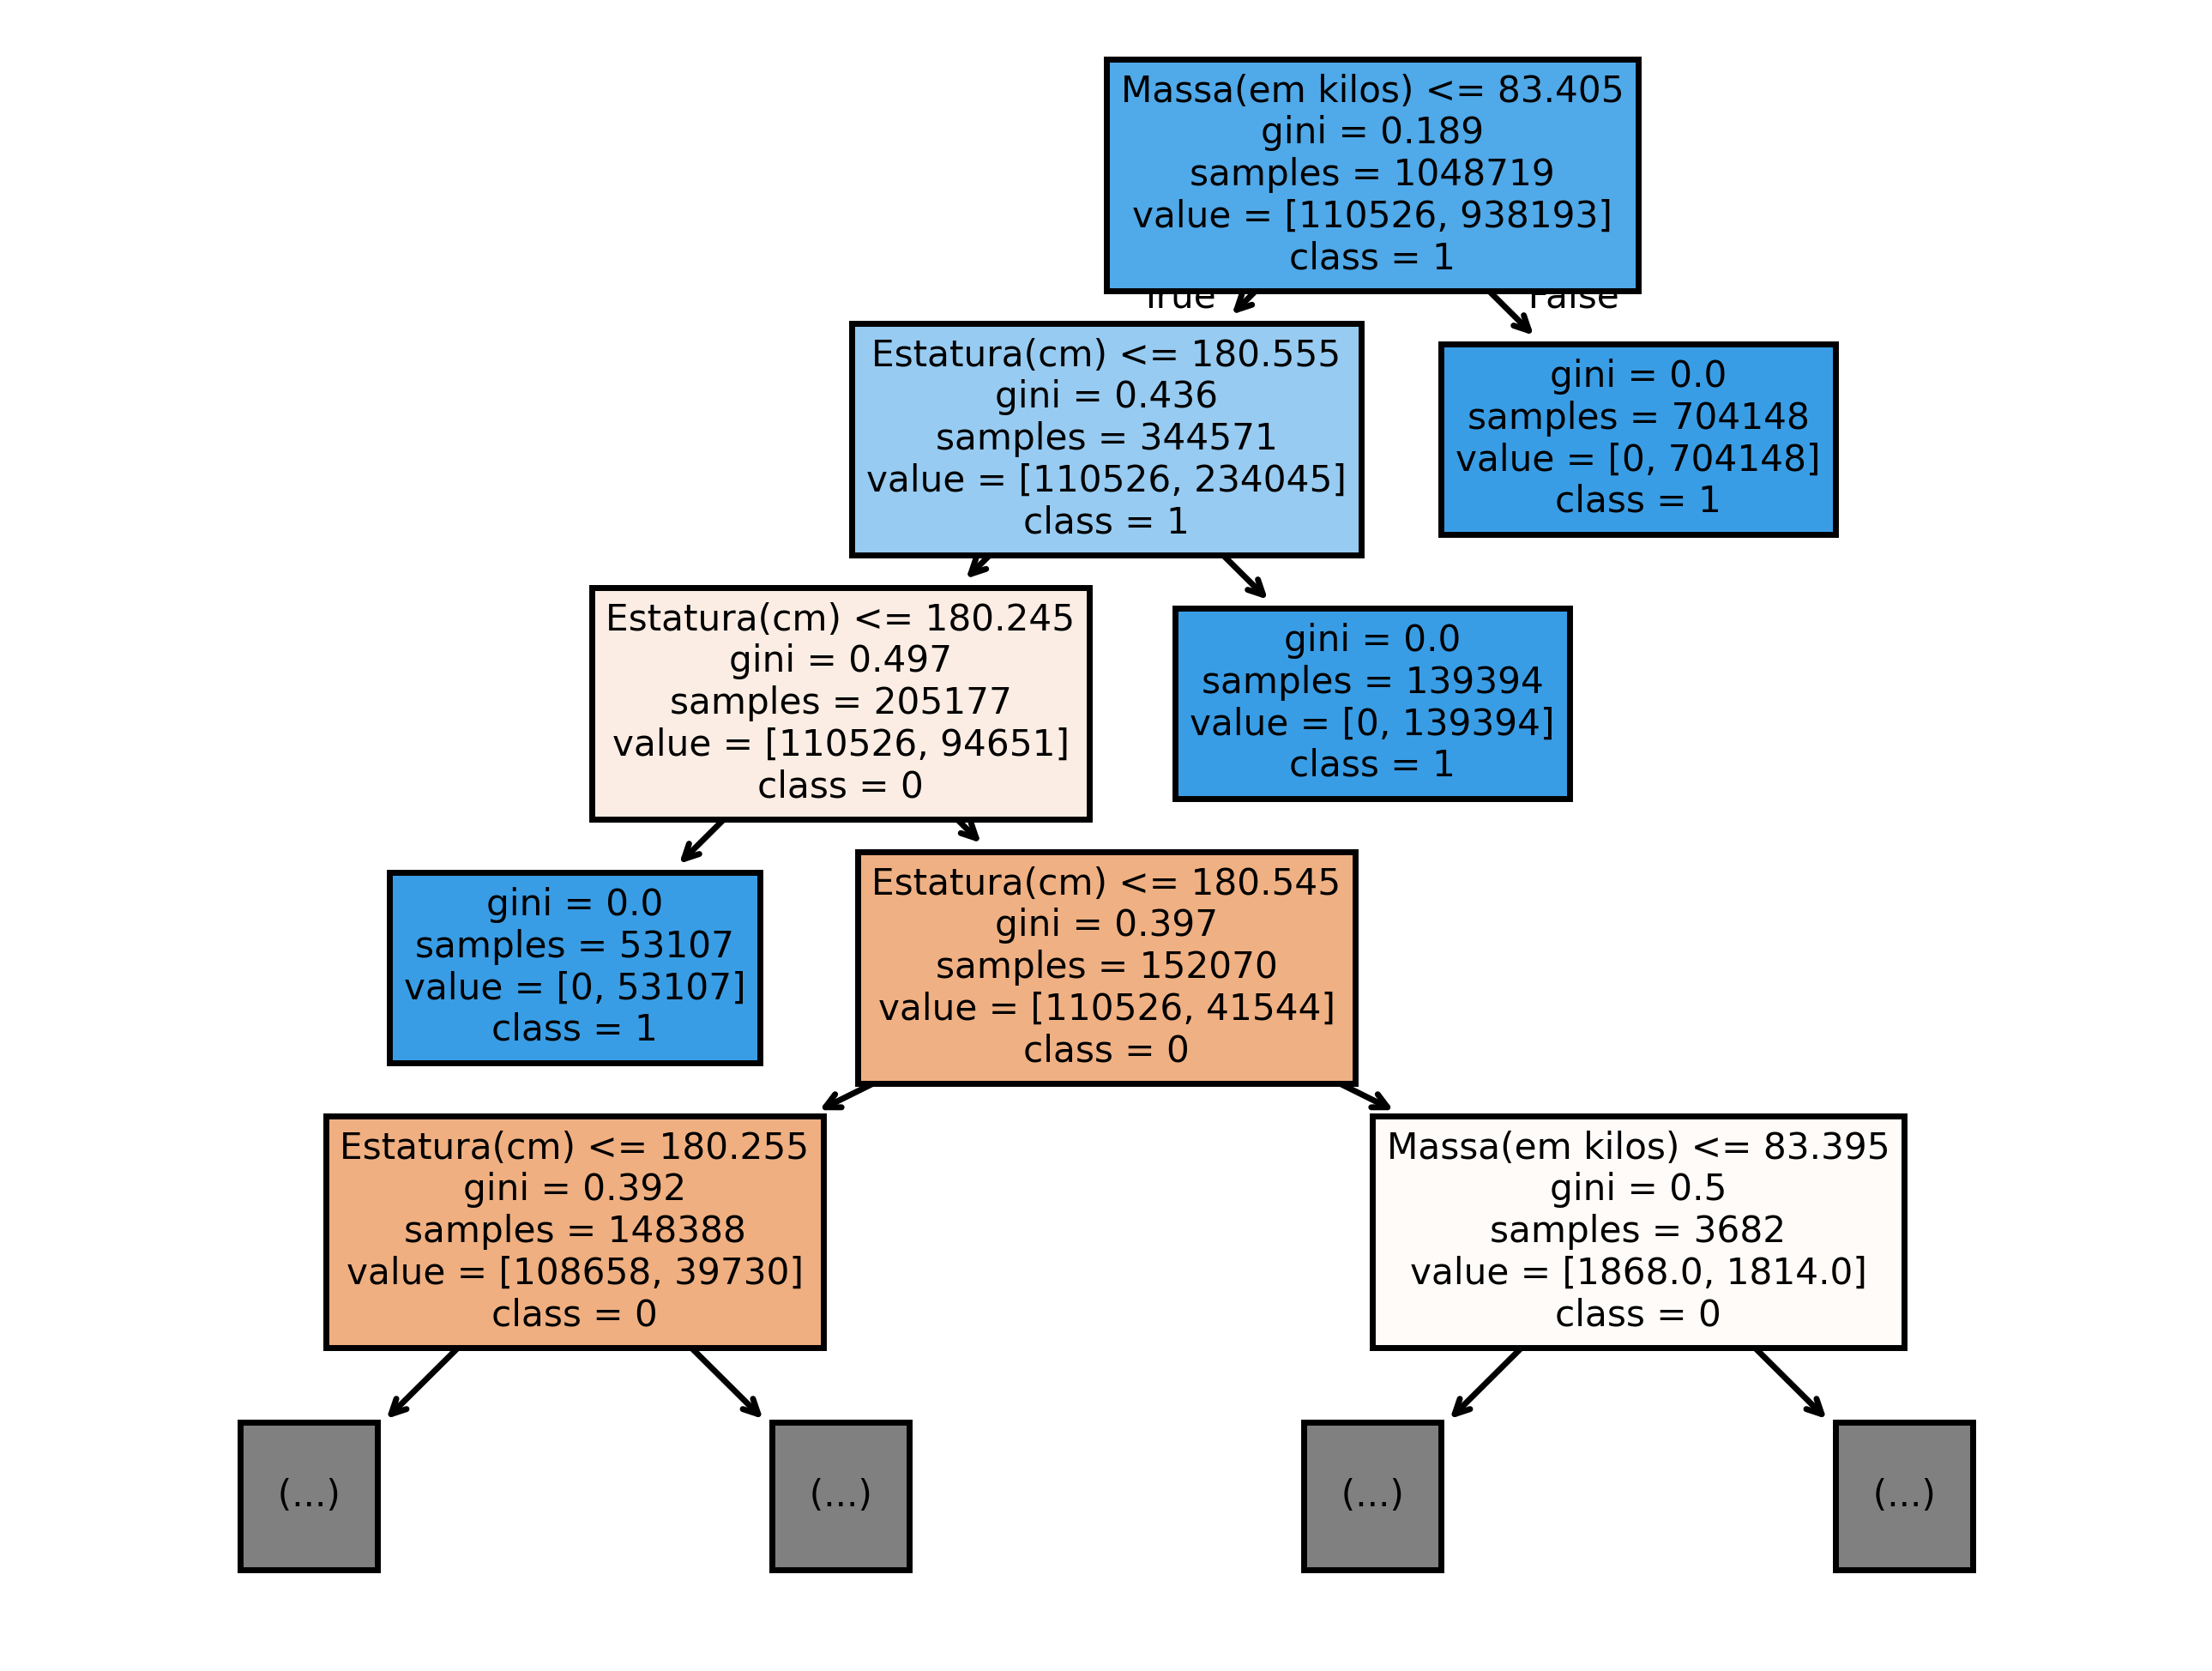

In [22]:
from functools import cache
from pathlib import Path
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

path = Path()
data = path/'../data'

parquet_path = data/'dados_clones.parquet'
    
try:
    df = pd.read_parquet(parquet_path)

except Exception as e:

    try:
        df = pd.read_parquet(parquet_path, engine='fastparquet')

    except Exception as ex:
        raise RuntimeError(f'ERRO: {ex}.\n\n==> Verifique as versões instaladas de pandas/pyarrow e considere reinstalar/atualizar. ')

df.rename(columns={'Status ': 'Status'}, inplace=True)

# df
# df.dtypes
# df.shape

from sklearn import tree

sw_model = tree.DecisionTreeClassifier()

learn_df = df.replace({
    'Tipo 1': 1, 'Tipo 2': 2, 'Tipo 3': 3, 'Tipo 4': 4, 'Tipo 5': 5,
    'Defeituoso': 0, 'Apto': 1,
    #'Yoda': 1, 'Shaak Ti': 1, 'Obi-Wan Kenobi': 3, 'Aayla Secura': 4, 'Mace Windu': 5,
    })

sw_features = [
    "Massa(em kilos)", "Estatura(cm)",#    "Distância Ombro a ombro", "Tamanho do crânio", "Tamanho dos pés", "Tempo de existência(em meses)"
    ]
sw_target = "Status"

sw_X = learn_df[sw_features]
sw_y = learn_df[sw_target]

sw_model.fit(X=sw_X, y=sw_y)

import matplotlib.pyplot as plt


plt.figure(dpi=500)

sw_class_names = [str(class_item) for class_item in sw_model.classes_]

tree.plot_tree(
    sw_model,
    feature_names=sw_features,
    class_names=sw_class_names,
    filled=True,
    max_depth=4,
)

---

> Conteúdo "patrocinado" pelo [Téo Calvo - Curso de ML 2025](https://www.youtube.com/playlist?list=PLvlkVRRKOYFR6_LmNcJliicNan2TYeFO2):
- [YouTube](https://www.youtube.com/@teomewhy)
- [Twitch](https://www.twitch.tv/teomewhy)
- [GitHub](https://github.com/TeoMeWhy)